In [1]:
from sympy import Symbol, integrate, Piecewise, simplify, lambdify, exp, erfc, sqrt, pi, oo
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.special
from IPython.display import display, Math
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

Matplotlib is building the font cache; this may take a moment.


# Expected value of the maximum order statistics

## Derivation

*See [this document](https://www.colorado.edu/amath/sites/default/files/attached-files/order_stats.pdf) for more about order statistics.*

The problem to solve is to get the expected value of a sample of size $n$ from an arbitrary random distribution. To do this, we need to use [order statistics](https://en.wikipedia.org/wiki/Order_statistic), which is a relatively elementary statistics concept.

First, we must define some notation. Let $X_1, X_2, \ldots, X_n$ (in general, $X_i$) be random variables representing the $i$-th sample of some distribution represented by the PDF $f(x)$ (and CDF $F(x)$). For example, $X_4$ is the random variable associated with the 4th time you sampled this random distribution. For simplification, we assume that each sample ($X_i$) is independent and identically distributed. Order statistics also defines the following random variables:

$$
\begin{align}
X_{(1)} & = \min(X_1, X_2, \ldots, X_n) \\
X_{(2)} & = \text{2nd smallest of} X_1, X_2, \ldots, X_n \\
X_{(n)} & = \max(X_1, X_2, \ldots, X_n) \\
\end{align}
$$

What we are interested is in the random variable $X_{(n)}$, as we are interested in the value of the maximum from a $n$ samples. The expected value is thus $E(X_{(n)})$.

Using the definition of the expected value, we can expand the formula as follows:

$$E(X_{(n)}) = \int_{-\infty}^{\infty} x f_{X_{(n)}}(x) dx$$

where $f_{X_{(n)}}(x)$ is the PDF of $X_{(n)}$. This can be calculated by first deriving its CDF, $F_{X_{(n)}}(x)$:

$$
\begin{align}
F_{X_{(n)}}(x) & = P(X_{(n)} \leq x) & \\
               & = P(X_1 \leq x, X_2 \leq x, \ldots, X_n \leq x) & \\
               & = P(X_1 \leq x) P(X_2 \leq x) \ldots P(X_n \leq x) & \text{by independence} \\
               & = \prod_{i=1}^{n} P(X_i \leq x) & \text{by identical distribution} \\
               & = (P(X_i \leq x))^n & 
\end{align}
$$

Noting that $P(X_i \leq x)$ is actually just the definition of CDF of the original distribution we are sampling from, $F(x)$, then we can conclude that the CDF for the maximum order statistics is:

$$
F_{X_{(n)}}(x) = (F(x))^n
$$

We still need to find the PDF for this, which can be derived from the definition of the PDF:

$$
\begin{align}
f_{X_{(n)}}(x) & = \frac{d}{dx} F_{X_{(n)}}(x) & \\
               & = \frac{d}{dx} (F(x))^n & \\
               & = n(F(x))^{n-1}f(x) & \text{by substitution}
\end{align}
$$

The expected value for $X_{(n)}$ can thus be calculated if the CDF and PDF of the original distribution is known. Alternatively, numerical integration can be used.

$$
\begin{align}
E(X_{(n)}) = \int_{-\infty}^{\infty} x n(F(x))^{n-1}f(x) dx
\end{align}
$$

We go through a few common distributions in the following sections.

## Uniform distribution

The uniform distribution has a simple PDF and CDF definitions. We also plot the PDF and CDF given $a = 0$ and $b = 1$.

PDF


Piecewise((0, a > x), (1/(-a + b), b >= x), (0, True))

CDF


Piecewise((0, a > x), ((-a + x)/(-a + b), b >= x), (1, True))

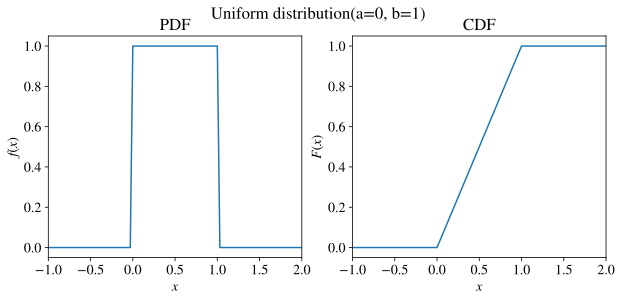

In [2]:
x = Symbol("x")
a = Symbol("a")
b = Symbol("b")

uniform_cdf = Piecewise(
  (0, x < a),
  ((x - a) / (b - a), (x >= a) & (x <= b)),
  (1, x > b)
)

uniform_pdf = Piecewise(
  (0, x < a),
  (1 / (b - a), (x >= a) & (x <= b)),
  (0, x > b),
)

print("PDF")
display(uniform_pdf)

print("CDF")
display(uniform_cdf)

a_value = 0
b_value = 1

xv = np.linspace(-1, 2, 100)

uniform_cdf_f = lambdify(x, uniform_cdf.subs({a: a_value, b: b_value}), "numpy")
uniform_pdf_f = lambdify(x, uniform_pdf.subs({a: a_value, b: b_value}), "numpy")

fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 2, 1)
ax.plot(xv, uniform_pdf_f(xv))
ax.set_xlim(-1, 2)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.set_title("PDF")

ax = fig.add_subplot(1, 2, 2)
ax.plot(xv, uniform_cdf_f(xv))
ax.set_xlim(-1, 2)
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$")
ax.set_title("CDF")

_ = fig.suptitle(f"Uniform distribution(a={a_value}, b={b_value})")

Now let's take a look at the maximum order statistics distribution as a function of $n$, the number of samples assuming that $a = 0$ and $b = 1$. As you can see, as we increase the number of samples, the probability density function shifts towards the right nonlinearly.

Text(0.5, 1.0, 'n=10')

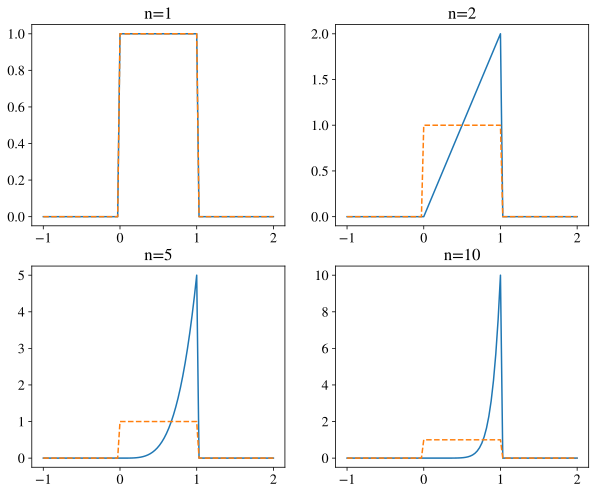

In [3]:
n = Symbol("n", positive=True)

maximum_order_uniform_pdf = n * uniform_cdf**(n-1) * uniform_pdf
maximum_order_uniform_pdf_f = lambdify([n, x], maximum_order_uniform_pdf.subs({a: a_value, b: b_value}), "numpy")

xv = np.linspace(-1, 2, 100)

fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(2, 2, 1)
ax.plot(xv, maximum_order_uniform_pdf_f(1, xv))
ax.plot(xv, uniform_pdf_f(xv), "--")
ax.set_title("n=1")

ax = fig.add_subplot(2, 2, 2)
ax.plot(xv, maximum_order_uniform_pdf_f(2, xv))
ax.plot(xv, uniform_pdf_f(xv), "--")
ax.set_title("n=2")

ax = fig.add_subplot(2, 2, 3)
ax.plot(xv, maximum_order_uniform_pdf_f(5, xv))
ax.plot(xv, uniform_pdf_f(xv), "--")
ax.set_title("n=5")

ax = fig.add_subplot(2, 2, 4)
ax.plot(xv, maximum_order_uniform_pdf_f(10, xv))
ax.plot(xv, uniform_pdf_f(xv), "--")
ax.set_title("n=10")

Let's now compute the expected value of $X_{(n)}$ as a function of $n$. We can see it rapidly approach 1 as $n$ increases.

<IPython.core.display.Math object>

Piecewise(((a + b*n)/(n + 1), a < b), (0, True))

(0.0, 1.0)

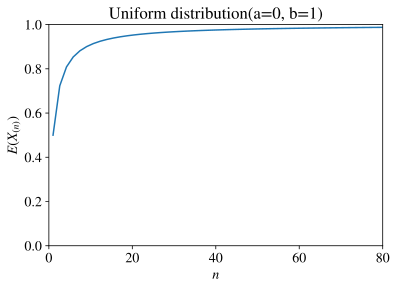

In [4]:
n = Symbol("n", positive=True)

maximum_order_uniform_pdf = n * uniform_cdf**(n-1) * uniform_pdf
expected_value_uniform_maximum_order_stats = simplify(integrate(x * maximum_order_uniform_pdf, (x, a, b)))
display(Math("$E_{X_{(n)}}$"))
display(expected_value_uniform_maximum_order_stats)

a_value = 0
b_value = 1

f = lambdify(n, expected_value_uniform_maximum_order_stats.subs({
  a: a_value,
  b: b_value,
}), "numpy")

maxn = 80
nn = np.linspace(1, maxn)
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(nn, f(nn))
ax.set_xlabel("$n$")
ax.set_ylabel("$E(X_{(n)})$")
ax.set_title(f"Uniform distribution(a={a_value}, b={b_value})")
ax.set_xlim(0, maxn)
ax.set_ylim(0, 1)

Uniform distribution is relatively simple and a closed form solution can be derived. With more complex distributions, this is not always possible, so we need to numerically integrate the equation $E(X_{(n)}) = \int_{-\infty}^{\infty} x n(F(x))^{n-1}f(x) dx$. We do this here with the normal uniform distribution so we validate we can do it properly. We just test the case for $n=1$ which should result in 0.5.

In [5]:
integrand_f = lambdify([n, x], (x * maximum_order_uniform_pdf).subs({a: a_value, b: b_value}), "numpy")
quad(lambda x: integrand_f(1, x), a_value, b_value)

(0.5, 5.551115123125783e-15)

## Normal distribution

The normal distribution has a slightly more complex definition (sympy seems to really go wild with forcing the $\sqrt{2}$ at the top...):

In [6]:
x = Symbol("x")
mu = Symbol("mu")
sigma = Symbol("sigma")

normal_pdf = exp(-(x - mu)**2 / (2 * sigma**2)) / sqrt(2 * pi * sigma**2)
normal_cdf = (1 + 1 - erfc((x - mu) / (sigma * sqrt(2)))) / 2 # use erf = 1-erfc as sympy doesn't have erf

print("PDF")
display(normal_pdf)

print("CDF")
display(normal_cdf)

mu_value = 0.0
sigma_value = 1.0

display(normal_pdf.subs({mu: mu_value, sigma: sigma_value}))

PDF


sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sqrt(sigma**2))

CDF


1 - erfc(sqrt(2)*(-mu + x)/(2*sigma))/2

0.5*sqrt(2)*exp(-0.5*x**2)/sqrt(pi)

This results in too complex of a PDF for $X_{(n)}$ to solve in a closed form, so we have to solve it numerically by substituting some numbers. I'm reimplementing the functions directly in Python as this will be easier going forward.

First we make sure the implementation of the functions are correct by plotting the normal distribution PDF and CDF.

Text(0.5, 1.0, 'CDF')

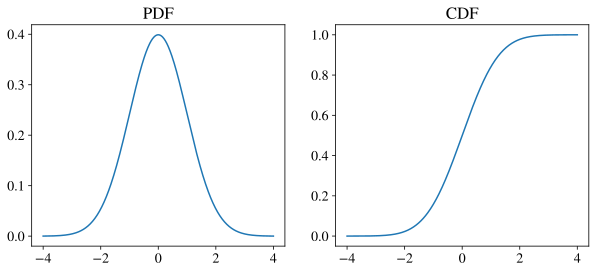

In [7]:
def normal_pdf_f(x, mu, sigma):
  return np.exp(-(x - mu)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

def normal_cdf_f(x, mu, sigma):
  return (1 + scipy.special.erf((x - mu) / (sigma * np.sqrt(2)))) / 2

mu_value = 0
sigma_value = 1.0

fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 2, 1)

xv = np.linspace(mu_value - 4 * sigma_value, mu_value + 4 * sigma_value, 500)
ax.plot(xv, normal_pdf_f(xv, mu_value, sigma_value))
ax.set_title("PDF")

ax = fig.add_subplot(1, 2, 2)

xv = np.linspace(mu_value - 4 * sigma_value, mu_value + 4 * sigma_value, 500)
ax.plot(xv, normal_cdf_f(xv, mu_value, sigma_value))
ax.set_title("CDF")

Then we implement the maximum order statistics CDF and plot the distribution for various $n$. Predictably, the probability shifts towards the right and is not symmetric.

(0.0, 8.432937394974397e-15)

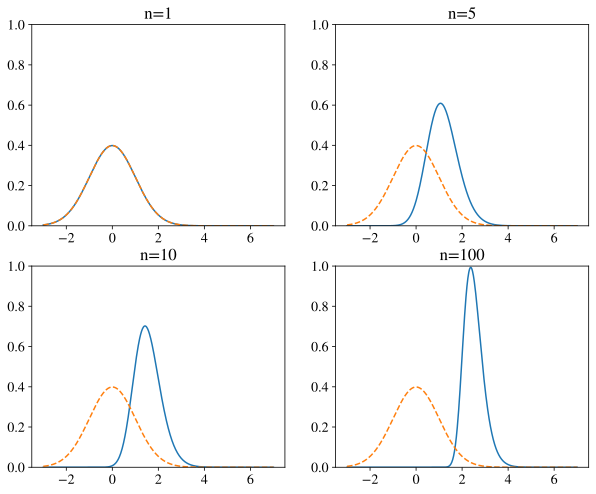

In [8]:
def maximum_order_normal_pdf_f(n, x, mu, sigma):
  return n * normal_cdf_f(x, mu, sigma)**(n-1) * normal_pdf_f(x, mu, sigma)

mu_value = 0
sigma_value = 1.0
xv = np.linspace(mu_value - 3 * sigma_value, mu_value + 7 * sigma_value, 500)

fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(2, 2, 1)
ax.plot(xv, maximum_order_normal_pdf_f(1, xv, mu_value, sigma_value))
ax.plot(xv, normal_pdf_f(xv, mu_value, sigma_value), "--")
ax.set_title("n=1")
ax.set_ylim(0, 1.0)

ax = fig.add_subplot(2, 2, 2)
ax.plot(xv, maximum_order_normal_pdf_f(5, xv, mu_value, sigma_value))
ax.plot(xv, normal_pdf_f(xv, mu_value, sigma_value), "--")
ax.set_title("n=5")
ax.set_ylim(0, 1.0)

ax = fig.add_subplot(2, 2, 3)
ax.plot(xv, maximum_order_normal_pdf_f(10, xv, mu_value, sigma_value))
ax.plot(xv, normal_pdf_f(xv, mu_value, sigma_value), "--")
ax.set_title("n=10")
ax.set_ylim(0, 1.0)

ax = fig.add_subplot(2, 2, 4)
ax.plot(xv, maximum_order_normal_pdf_f(100, xv, mu_value, sigma_value))
ax.plot(xv, normal_pdf_f(xv, mu_value, sigma_value), "--")
ax.set_title("n=100")
ax.set_ylim(0, 1.0)

quad(
  lambda x: x * maximum_order_normal_pdf_f(1, x, mu_value, sigma_value),
  mu_value - 5 * sigma_value,
  mu_value + 5 * sigma_value
)

Let's see how the PDF evolves with a large number of $n$ from 1 to 500. The dots represents the peak of the PDF for each $n$ while the distribution for $n=1$ and $n=500$ is plotted at the beginning and end.

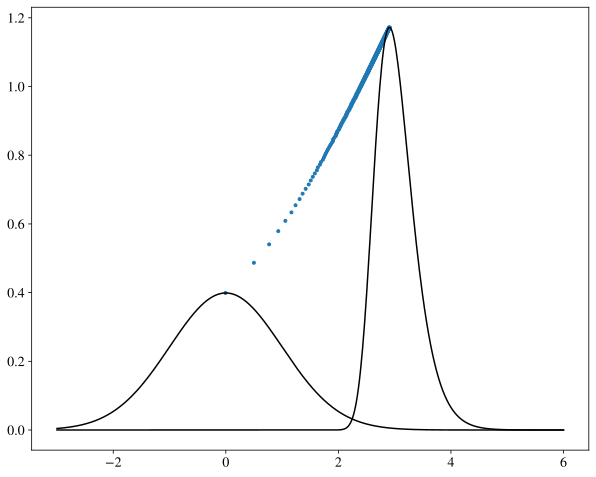

In [9]:
fig = plt.figure(figsize=[10, 8])

ax = fig.add_subplot(1, 1, 1)

min_n = 1
max_n = 500

xs = []
ys = []

mu_value = 0
sigma_value = 1.0
xv = np.linspace(mu_value - 3 * sigma_value, mu_value + 6 * sigma_value, 500)

for n in range(min_n, max_n, 1):
  p = maximum_order_normal_pdf_f(n, xv, mu_value, sigma_value)
  i = np.argmax(p)
  xs.append(xv[i])
  ys.append(p[i])

ax.plot(xs, ys, ".")
ax.plot(xv, maximum_order_normal_pdf_f(min_n, xv, mu_value, sigma_value), 'k-')
ax.plot(xv, maximum_order_normal_pdf_f(max_n, xv, mu_value, sigma_value), 'k-')

Next, let's take a look at the expected values. We can see an abrupt increase between $n = 0$ and $n = 40$ (right chart) and then a gradually increase of $E_{X_{(n)}}$ towards $3.5\sigma$ (left chart). I'm not sure if this asymptotically approach anything tho.

Text(0.5, 0.98, 'Normal distribution ($\\mu = 0$ $\\sigma = 1.0$)')

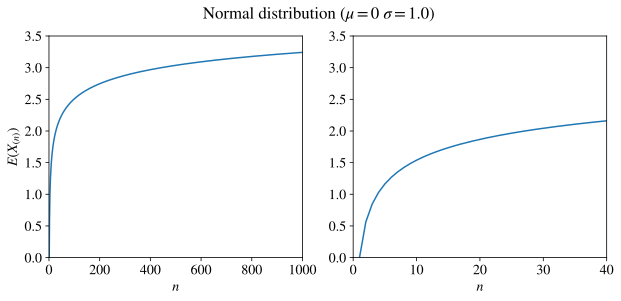

In [10]:
min_n = 1
max_n = 1000

xs = []
ys = []

mu_value = 0
sigma_value = 1.0
xv = np.linspace(mu_value - 3 * sigma_value, mu_value + 6 * sigma_value, 500)

for n in range(min_n, max_n, 1):
  xs.append(n)
  ys.append(quad(
    lambda x: x * maximum_order_normal_pdf_f(n, x, mu_value, sigma_value),
    mu_value - 5 * sigma_value,
    mu_value + 8 * sigma_value
  )[0])

fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 2, 1)

ax.plot(xs, ys)
ax.set_xlim(0, max_n)
ax.set_ylim(0, 3.5)
ax.set_xlabel("$n$")
ax.set_ylabel("$E(X_{(n)})$")

ax = fig.add_subplot(1, 2, 2)

ax.plot(xs, ys)
ax.set_xlim(0, 40)
ax.set_ylim(0, 3.5)
ax.set_xlabel("$n$")

fig.suptitle(fr"Normal distribution ($\mu = {mu_value}$ $\sigma = {sigma_value}$)")

## Making the code generic

From the beginning of the system, we can see that the CDF and PDF of $X_{(n)}$, as well as $E(X_{(n)})$ always follow the same equation:

$$
\begin{align}
F_{X_{(n)}}(x) & = (F(x))^n \\
f_{X_{(n)}}(x) & = n(F(x))^{n-1}f(x) \\
E(X_{(n)})     & = \int_{-\infty}^{\infty} x n(F(x))^{n-1}f(x) dx
\end{align}
$$

Since we are doing numerical integration, we can implement these functions generically so we can extend our code to work with arbitrary distributions. We do this by creating some functions that will call an underlying PDF/CDF function `f(x, **args)`, where `args` are some arbitrary arguments (such `mu` and `sigma` for the normal distribution).

In [11]:
def maximum_order_cdf(n, x, underlying_cdf_f, *args):
  return underlying_cdf_f(x, *args)**n

def maximum_order_pdf(n, x, underlying_cdf_f, underlying_pdf_f, *args):
  return n * underlying_cdf_f(x, *args)**(n - 1) * underlying_pdf_f(x, *args)

def maximum_order_expected_value(n: float, underlying_cdf_f, underlying_pdf_f, integration_bounds, *args) -> (float, float):
  integrand_f = lambda x: x * maximum_order_pdf(n, x, underlying_cdf_f, underlying_pdf_f, *args)
  return quad(integrand_f, integration_bounds[0], integration_bounds[1])

Let's verify this code with the normal distribution before moving on to other distributions:

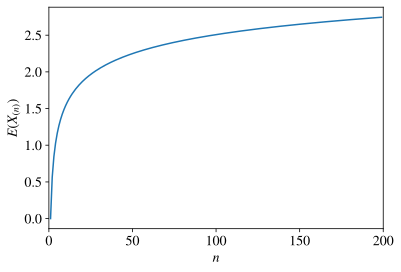

In [12]:
def plot_expected_value(underlying_cdf_f, underlying_pdf_f, *args, **kwargs):
  integration_bounds = kwargs["integration_bounds"]
  min_n, max_n = kwargs.get("n_bounds", (1, 200))
  title = kwargs.get("title")
  
  xs = []
  ys = []

  for n in range(min_n, max_n):
    xs.append(n)
    y, _abserr = maximum_order_expected_value(n, underlying_cdf_f, underlying_pdf_f, integration_bounds, *args)
    ys.append(y)

  fig = plt.figure(figsize=[6, 4])
  ax = fig.add_subplot(1, 1, 1)

  ax.plot(xs, ys)
  ax.set_xlim(0, max_n)
  ax.set_xlabel("$n$")
  ax.set_ylabel("$E(X_{(n)})$")
  if title:
    ax.set_title(title)

plot_expected_value(
  normal_cdf_f, normal_pdf_f,
  0, 1,
  n_bounds=(1, 200),
  integration_bounds=(mu_value - 5 * sigma_value, mu_value + 8 * sigma_value)
)

Let's also create some functions to plot the PDF and CDFs.

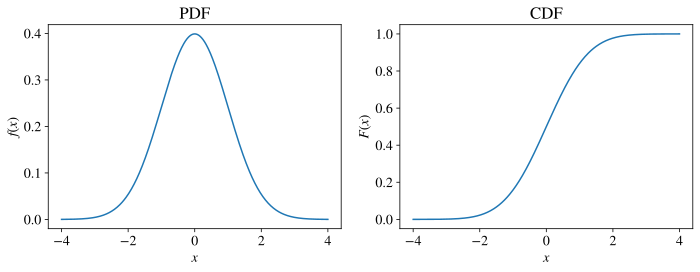

In [13]:
def plot_cdf_pdf(underlying_cdf_f, underlying_pdf_f, *args, **kwargs):
  x_bounds = kwargs["x_bounds"]
  xv = np.linspace(x_bounds[0], x_bounds[1], 500)

  fig = plt.figure(figsize=[10, 4])
  ax = fig.add_subplot(1, 2, 1)
  ax.plot(xv, underlying_pdf_f(xv, *args))
  ax.set_title("PDF")
  ax.set_xlabel("$x$")
  ax.set_ylabel("$f(x)$")
  
  ax = fig.add_subplot(1, 2, 2)
  ax.plot(xv, underlying_cdf_f(xv, *args))
  ax.set_title("CDF")
  ax.set_xlabel("$x$")
  ax.set_ylabel("$F(x)$")

  fig.tight_layout()

plot_cdf_pdf(
  normal_cdf_f, normal_pdf_f, 
  mu_value, sigma_value, 
  x_bounds=(mu_value - 4 * sigma_value, mu_value + 4 * sigma_value)
)

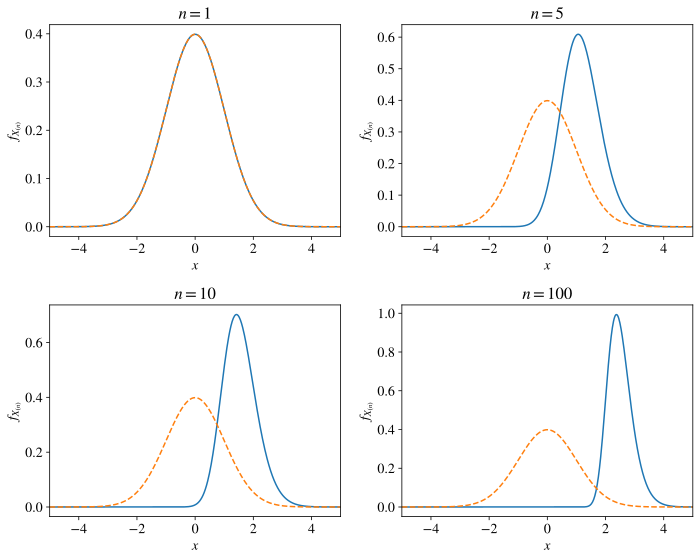

In [14]:
def plot_maximum_order_pdfs(underlying_cdf_f, underlying_pdf_f, *args, **kwargs):
  x_bounds = kwargs["x_bounds"]
  ns = kwargs["n"]
  if len(ns) != 4:
    raise Exception("must specify 4 ns")
  xv = np.linspace(x_bounds[0], x_bounds[1], 500)

  fig = plt.figure(figsize=[10, 8])
  for i, n in enumerate(ns):
    ax = fig.add_subplot(2, 2, i+1)
    ax.plot(xv, maximum_order_pdf(n, xv, underlying_cdf_f, underlying_pdf_f, *args))
    ax.plot(xv, underlying_pdf_f(xv, *args), "--")
    ax.set_xlim(x_bounds)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f_{X_{(n)}}$")
    ax.set_title(f"$n = {n}$")

  fig.tight_layout()

plot_maximum_order_pdfs(
  normal_cdf_f, normal_pdf_f, 
  mu_value, sigma_value, 
  x_bounds=(mu_value - 5 * sigma_value, mu_value + 5 * sigma_value),
  n=[1, 5, 10, 100]
)

## Log normal distribution

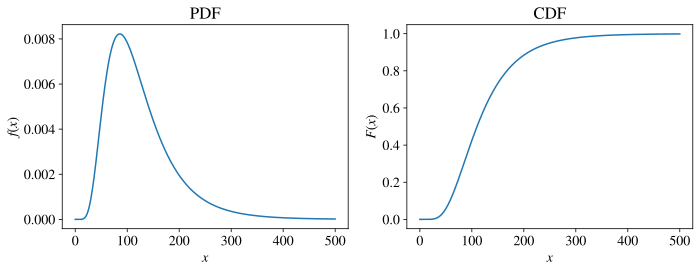

In [15]:
def log_normal_pdf_f(x, mu, sigma):
  return np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi))

def log_normal_cdf_f(x, mu, sigma):
  return (1 + scipy.special.erf((np.log(x) - mu) / (sigma * np.sqrt(2)))) / 2

mu_value, sigma_value = 4.7, 0.5

plot_cdf_pdf(
  log_normal_cdf_f, log_normal_pdf_f, 
  mu_value, sigma_value, 
  x_bounds=(1e-5, 500)
)

The maximum order PDF for various $n$ is shown here:

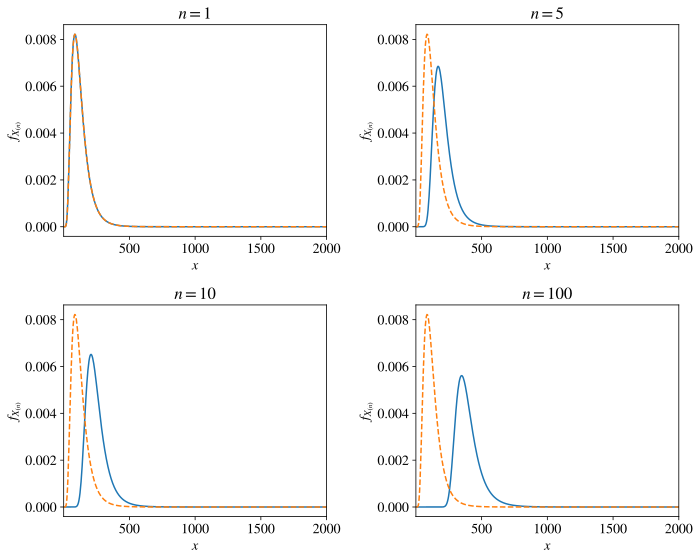

In [16]:
plot_maximum_order_pdfs(
  log_normal_cdf_f, log_normal_pdf_f, 
  mu_value, sigma_value, 
  x_bounds=(1e-5, 2000),
  n=[1, 5, 10, 100]
)

Expected value as a function of $n$:

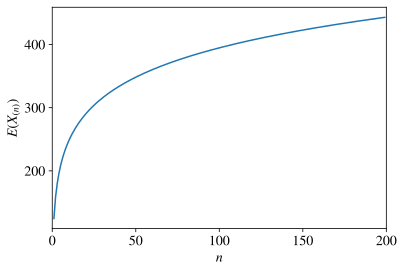

In [17]:
plot_expected_value(
  log_normal_cdf_f, log_normal_pdf_f,
  mu_value, sigma_value,
  n_bounds=(1, 200),
  integration_bounds=(1e-5, 4000),
)

## Exponential distribution

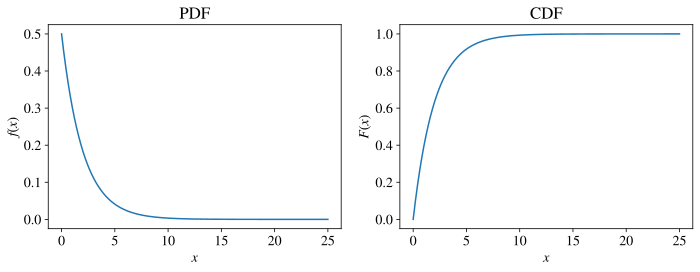

In [18]:
def exp_pdf_f(x, lamb):
  return lamb * np.exp(-lamb * x)

def exp_cdf_f(x, lamb):
  return 1 - np.exp(-lamb * x)

lamb = 0.5

plot_cdf_pdf(
  exp_cdf_f, exp_pdf_f, 
  lamb,
  x_bounds=(1e-5, 25)
)

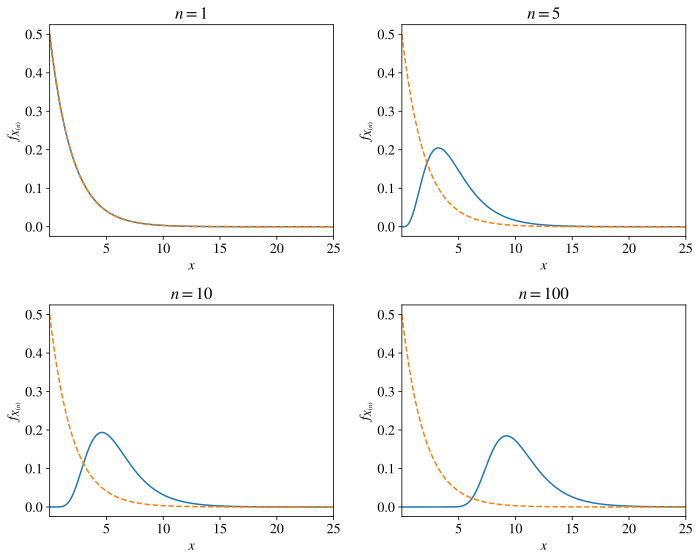

In [19]:
plot_maximum_order_pdfs(
  exp_cdf_f, exp_pdf_f, 
  lamb, 
  x_bounds=(1e-5, 25),
  n=[1, 5, 10, 100]
)

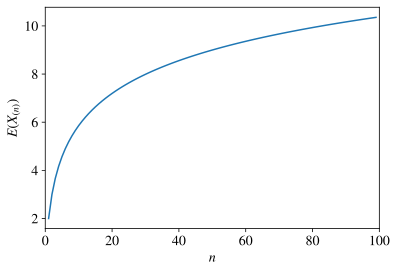

In [20]:
plot_expected_value(
  exp_cdf_f, exp_pdf_f, 
  lamb,
  n_bounds=(1, 100),
  integration_bounds=(1e-5, 800),
)

## Estimating log-normal distribution parameters

### From raw data

Use [maximum likelihood estimation](https://en.wikipedia.org/wiki/Log-normal_distribution#Maximum_likelihood_estimator) to estimate the parameters.

### From percentile data

The quantile function for the log-normal distribution is:

$$
Q(p) = \exp(\mu + \sqrt{2 \sigma^2} \mathrm{erf}^{-1}(2p - 1)))
$$

where $Q(p) = F_X^{-1}(p)$.

The mean of the distribution is at $\exp(\mu + \frac{\sigma^2}{2})$ and the median is just $\exp(\mu)$.

The simplest way to solve this is to do a curve fit given all the percentile data. This allows us to extrapolate a log-normal distribution with only a few data points that's easily available. If we know that:

$$
\begin{align}
Q(p_1, \sigma, \mu) & = y_1 \\
Q(p_2, \sigma, \mu) & = y_2
\end{align}
$$

Then we can simply solve the least squares problem for $\sigma$ and $\mu$:

$$
\mathrm{argmin}_{\sigma,\mu} \sum_{i=1}{N} (y_i - Q(p_i, \sigma, \mu))^2
$$

Let's make up some latency:

- p50 = 100
- p75 = 125
- p95 = 300
- p99 = 600

popt = [4.2503273  0.91777202]
perr = [0.17520811 0.08165535]
pcov = [[ 0.03069788 -0.01399193]
 [-0.01399193  0.0066676 ]]


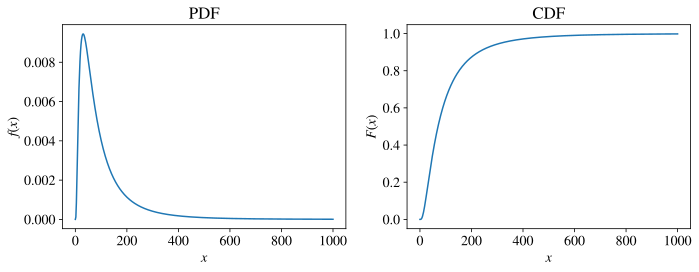

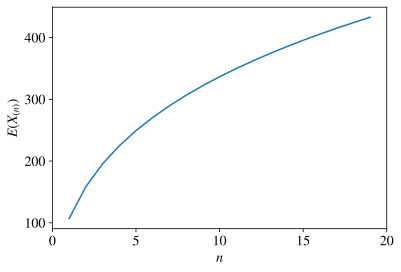

In [21]:
from scipy.optimize import curve_fit

def quantile_lognormal(p, mu, sigma):
  return np.exp(mu + np.sqrt(2 * sigma**2) * scipy.special.erfinv(2 * p - 1))


pdata = np.array([0.5, 0.75, 0.95, 0.99])
ydata = np.array([100, 125, 300, 600])

popt, pcov = curve_fit(quantile_lognormal, pdata, ydata)
perr = np.sqrt(np.diag(pcov))

print(f"popt = {popt}") # mu, sigma
print(f"perr = {perr}") # one standard deviation error
print(f"pcov = {pcov}") # covariance

mu_value, sigma_value = popt

plot_cdf_pdf(
  log_normal_cdf_f, log_normal_pdf_f, 
  mu_value, sigma_value, 
  x_bounds=(1e-5, 1000)
)

plot_expected_value(
  log_normal_cdf_f, log_normal_pdf_f,
  mu_value, sigma_value,
  n_bounds=(1, 20),
  integration_bounds=(1e-5, 4000),
)

# Minimum order statistics

The minimum order statistics is about $X_{(1)}$. The CDF can be calculated as:

$$
\begin{align}
F_{X_{(1)}}(x) & = P(X_{(1)} \leq x) & \\
               & = 1 - P(X_{(1)} > x) & \\
               & = 1 - P(X_1 > x, X_2 > x, \ldots, X_n > x) & \\
               & = 1 - P(X_1 > x) P(X_2 > x) \ldots P(X_n > x) & \text{by independence} \\
               & = 1 - \prod_{i=1}^{n} P(X_i > x) & \text{by identical distribution} \\
               & = 1 - (P(X_i > x))^n & \\
               & = 1 - (1 - P(X_i \leq x))^n & \\
               & = 1 - (1 - F(x))^n &
\end{align}
$$

The PDF is then:

$$
\begin{align}
f_{X_{(1)}}(x) & = \frac{d}{dx} F_{X_{(1)}}(x) & \\
               & = \frac{d}{dx} (1 - (1 - F(x))^n) & \\
               & = n(1 - F(x))^{n-1}f(x) & \text{by substitution}
\end{align}
$$

In this case, we care more about the quantile than the expected value, and quantiles are calculated by solving for $x$ in:

$$
F(x) - p = 0
$$

Effectively, the quantile function $Q(p) = x$ is the inverse of the CDF. 

## Uniform distribution

Uniform minimum order PDF


Piecewise((0, a > x), (-n*(-(b - x)/(a - b))**(n - 1)/(a - b), b >= x), (0, True))

Expected value:


Piecewise(((a*n + b)/(n + 1), a < b), (0, True))

(0.0, 1.0)

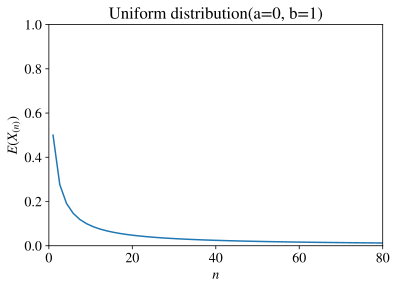

In [22]:
n = Symbol("n", positive=True)

minimum_order_uniform_pdf = n * (1 - uniform_cdf)**(n-1) * uniform_pdf

print("Uniform minimum order PDF")
display(simplify(minimum_order_uniform_pdf))

expected_value_uniform_minimum_order_stats = simplify(integrate(x * minimum_order_uniform_pdf, (x, a, b)))
print("Expected value:")
display(expected_value_uniform_minimum_order_stats)

a_value = 0
b_value = 1

f = lambdify(n, expected_value_uniform_minimum_order_stats.subs({
  a: a_value,
  b: b_value,
}), "numpy")

maxn = 80
nn = np.linspace(1, maxn)
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(nn, f(nn))
ax.set_xlabel("$n$")
ax.set_ylabel("$E(X_{(n)})$")
ax.set_title(f"Uniform distribution(a={a_value}, b={b_value})")
ax.set_xlim(0, maxn)
ax.set_ylim(0, 1)

## Validate quantile calculations

In [23]:
from scipy.optimize import fsolve

print(fsolve(lambda x: uniform_cdf_f(x) - 0.25, 0.5))
print(fsolve(lambda x: uniform_cdf_f(x) - 0.5, 0.5))
print(fsolve(lambda x: uniform_cdf_f(x) - 0.99, 0.5))
print(fsolve(lambda x: uniform_cdf_f(x) - 0.75, 0.5))

[0.25]
[0.5]
[0.99]
[0.75]


## Reusable code for minimum order statistics

In [24]:
def minimum_order_cdf(n, x, underlying_cdf_f, *args):
  return 1 - (1 - underlying_cdf_f(x, *args))**n

def minimum_order_pdf(n, x, underlying_cdf_f, underlying_pdf_f, *args):
  return n * (1 - underlying_cdf_f(x, *args))**(n - 1) * underlying_pdf_f(x, *args)

def minimum_order_expected_value(n: float, underlying_cdf_f, underlying_pdf_f, integration_bounds, *args) -> (float, float):
  integrand_f = lambda x: x * minimum_order_pdf(n, x, underlying_cdf_f, underlying_pdf_f, *args)
  return quad(integrand_f, integration_bounds[0], integration_bounds[1])

def quantile_for_cdf(cdf_f, p, initial_guess):
  return fsolve(lambda x: cdf_f(x) - p, initial_guess)[0]

def plot_minimum_order_pdfs(underlying_cdf_f, underlying_pdf_f, *args, **kwargs):
  x_bounds = kwargs["x_bounds"]
  ns = kwargs["n"]
  quantile_guess = kwargs.get("quantile_guess", 100)
  if len(ns) != 4:
    raise Exception("must specify 4 ns")
  xv = np.linspace(x_bounds[0], x_bounds[1], 500)

  underlying_p99 = quantile_for_cdf(lambda x: underlying_cdf_f(x, *args), 0.99, quantile_guess)

  fig = plt.figure(figsize=[10, 8])
  for i, n in enumerate(ns):
    ax = fig.add_subplot(2, 2, i+1)
    min_order_p99 = quantile_for_cdf(lambda x: minimum_order_cdf(n, x, underlying_cdf_f, *args), 0.99, quantile_guess)
    ax.plot(xv, minimum_order_pdf(n, xv, underlying_cdf_f, underlying_pdf_f, *args), "k-")
    ax.plot(xv, underlying_pdf_f(xv, *args), "y--")
    
    ylim = ax.get_ylim()
    ax.plot([min_order_p99, min_order_p99], ylim, "k:")
    ax.plot([underlying_p99, underlying_p99], ylim, "y:")
    
    ax.set_ylim(ylim)
    ax.set_xlim(x_bounds)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f_{X_{(1)}}$")
    ax.set_title(f"$n = {n}$")

  fig.tight_layout()

## Log-normal distribution

We now look at the PDF for the minimum order statistics as well as plot the 99th percentile as dotted vertical lines. The yellow is the underlying log-normal distribution while the black lines are the minimum order distribution given $n$.

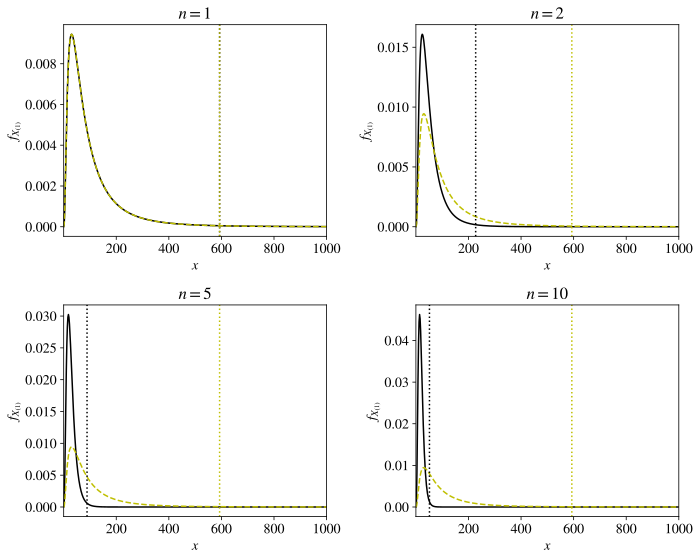

In [25]:
mu_value, sigma_value = 4.2503273, 0.91777202

plot_minimum_order_pdfs(
  log_normal_cdf_f, log_normal_pdf_f, 
  mu_value, sigma_value, 
  x_bounds=(1e-5, 1000),
  n=[1, 2, 5, 10],
  quantile_guess=50, # reduce this number if fsolve is not making good progress
)